In [44]:
from numpy import arange, zeros, array, exp
import matplotlib.pyplot as plt

In [45]:
C = 100e-12 #F
G = 10e-9   #S

V_r = -0.07    #V
V_L = -0.05   #V
delta_L = 0.002  #V

V_redef = -0.08    #V
V_pico = 0.05  #V

tau_u = 0.2  #s

a = 2e-9    #S
b = 20e-12  #A

dt = 1e-6   #s
tmax = 3    #s

V0 = V_L
u0 = 0

N = round(tmax / dt)   # numero de interacoes

In [46]:
def corrente(I, t, ti, tf):
    return  I*(t>=0)


def dVdt(V, u, I):
    return ( G * (V_r - V + delta_L * exp( (V-V_L)/delta_L ) ) -u + I ) / C


def dudt(V, u, I):
    return ( a * (V - V_r) - u ) / tau_u


def euler(I):
    V = zeros(N)
    u = zeros(N)
    tempos_disparos = []

    V[0] = V0
    u[0] = u0

    for i in range(N-1):
        if V[i] > V_pico:
            u[i] = u[i] + b
            V[i] = V_redef
            tempos_disparos.append(t[i])

        u[i+1] = u[i] + dt * dudt(V[i], u[i], I[i])
        V[i+1] = V[i] + dt * dVdt(V[i], u[i], I[i])

    return tempos_disparos

In [47]:
t = arange(0, tmax, dt)
frequenciasT1 = []
frequenciasTinf = []
correntes = []
c = 0

for i in range(200, 501, 25):
    I_inj = i*1e-12
    I = corrente(I_inj, t, ti=0.5, tf=2.5)
    tempos_disparos = euler(I)

    correntes.append(I_inj)

    if len(tempos_disparos) > 1:
        T1 = tempos_disparos[1] - tempos_disparos[0]
        T_inf = tempos_disparos[-1] - tempos_disparos[-2]
        freqt1 = 1 / T1
        freqtinf = 1 / T_inf

        frequenciasT1.append(freqt1)
        frequenciasTinf.append(freqtinf)
    else:
        frequenciasT1.append(0)
        frequenciasTinf.append(0)

In [48]:
frequenciasT1 = array(frequenciasT1)
frequenciasTinf = array(frequenciasTinf)
correntes = array(correntes)

In [49]:
plt.style.use('bmh')

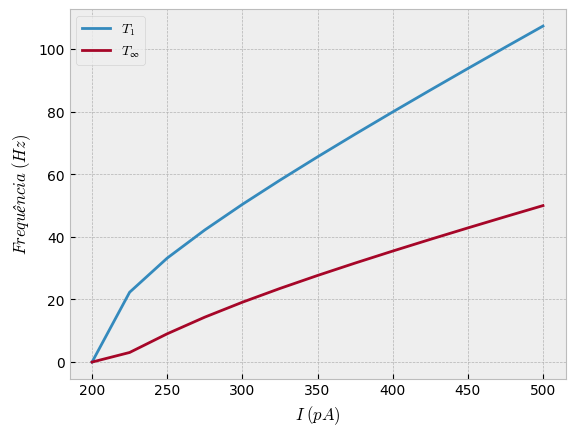

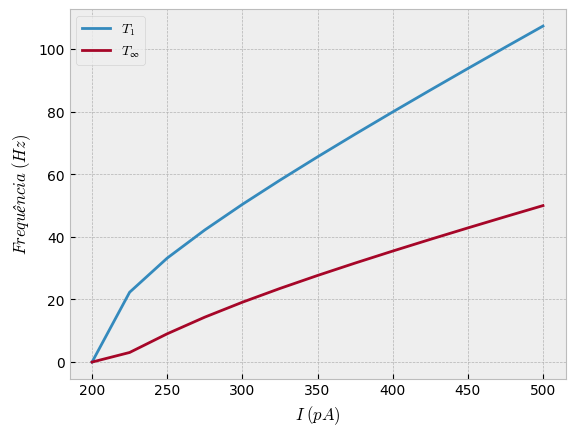

In [50]:
plt.figure()

plt.plot(correntes*1e12, frequenciasT1, label='$T_1$')
plt.plot(correntes*1e12, frequenciasTinf, label='$T_∞$')
plt.legend()

plt.ylabel(r'$Frequência \; (Hz)$')
plt.xlabel(r'$I \; (pA)$')

plt.show()